In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("train.csv")

In [8]:
df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [10]:
df.drop(['location','keyword'],axis=1,inplace=True)

In [11]:
df

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,Police investigating after an e-bike collided ...,1


Separating Real Tweets from Fake Tweets

In [12]:
real = df[df['target']==1]

In [13]:
real

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,Police investigating after an e-bike collided ...,1


In [14]:
fake = df[df['target']==0]

In [15]:
fake

,id,text,target
15,23,What's up man?,0
16,24,I love fruits,0
17,25,Summer is lovely,0
18,26,My car is so fast,0
19,28,What a goooooooaaaaaal!!!!!!,0
...,...,...,...
7581,10833,@engineshed Great atmosphere at the British Li...,0
7582,10834,Cramer: Iger's 3 words that wrecked Disney's s...,0
7584,10837,These boxes are ready to explode! Exploding Ki...,0
7587,10841,Sirens everywhere!,0


In [16]:
print('real disaster tweets percentage:',(len(real)/len(df))*100)

real disaster tweets percentage: 42.96597924602653


In [17]:
print('fake disaster tweets percentage:',(len(fake)/len(df))*100)

fake disaster tweets percentage: 57.03402075397347


## Data Visualisation

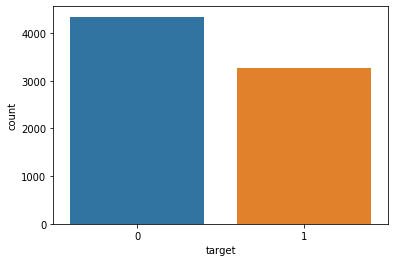

In [18]:
sns.countplot(df['target'])

The data is somewhat balanced

In [28]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tmatembo/nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
def tweet_cleaning(tweet):
    test_punc_removed = [char   for char in tweet if char not in string.punctuation]
    test_punc_removed_joined = ''.join(test_punc_removed)
    test_punc_removed_joined_clean = [word   for word in test_punc_removed_joined.split(' ') if word not in stopwords.words('english')]
    return test_punc_removed_joined_clean

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
vectorizer = CountVectorizer(analyzer=tweet_cleaning)

vectorizing the text and increasing the readablity of the text by removing the punctuations and stopwords!

In [37]:
disaster_tweet_vectorizer = vectorizer.fit_transform(df['text'])

In [38]:
print(vectorizer.get_feature_names());

['', '\n', '\n\n', '\n\n1', '\n\nBurned', '\n\nCalum36Chambers', '\n\nCity', '\n\nD', '\n\nEarly', '\n\nFOLLOW', '\n\nGet', '\n\nGood', '\n\nHow', '\n\nIf', '\n\nIm', '\n\nIn', '\n\nIve', '\n\nJust', '\n\nKowing', '\n\nMP', '\n\nMTVSummerStar', '\n\nMay', '\n\nMost', '\n\nMy', '\n\nN', '\n\nNot', '\n\nNotley', '\n\nOMFG', '\n\nPlane', '\n\nScreams', '\n\nShuffle', '\n\nSuch', '\n\nThe', '\n\nTodd', '\n\nWhat', '\n\nWhile', '\n\nWow', '\n\ndan', '\n\nfucking', '\n\nhttpstco6vyYER6PY0', '\n\nhttpstco7SPyDy1csc', '\n\nhttptcoIPwySnik0G', '\n\nmillions\napunk\nhang', '\n1', '\n8', '\nA', '\nAlso', '\nArmageddon', '\nAs', '\nBodies', '\nCROSED', '\nCheck\nHappy', '\nChelsea', '\nColts', '\nCumtown\nBJNutt\ncumslut2\nGirlsLoveCum', '\nDue', '\nEVERY', '\nFARRAKHAN', '\nFear', '\nFires', '\nForest', '\nGave', '\nGet', '\nGoBlue', '\nHe', '\nHomealone2', '\nI', '\nIn', '\nIssued', '\nIts', '\nJTW', '\nKatherines', '\nMTVHottest', '\nMay', '\nNever', '\nNo', '\nNorge2040', '\nOur', '\nParents',

In [39]:
print(disaster_tweet_vectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


This matrix shows the count of unique words (as shown in previous cell output) in each sentance.

In [40]:
disaster_tweet_vectorizer.shape

(7613, 26918)

there are 7613 disaster tweets and 21637 unique words.

In [41]:
label = df['target']

In [42]:
label.shape

(7613,)

## Training the Model


In [43]:
x = disaster_tweet_vectorizer

In [44]:
y = label

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [48]:
nb = MultinomialNB()

In [49]:
nb.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Making the prediction

In [51]:
prediction = nb.predict(x_test)

In [52]:
prediction


array([0, 1, 1, ..., 0, 1, 0])

## Checking Performance

In [53]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [54]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       892
           1       0.74      0.71      0.73       631

    accuracy                           0.78      1523
   macro avg       0.77      0.77      0.77      1523
weighted avg       0.78      0.78      0.78      1523



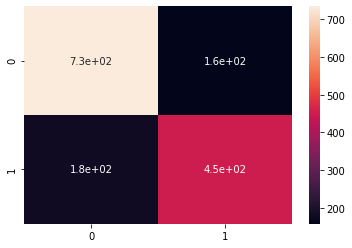

In [55]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
print(accuracy_score(y_test,prediction))

0.7774130006565988


The Model can classify real Disaster tweets from fake ones with 77 percent accuracy